# Pre-processing dati clorofilla a 300m

In questo foglio vengono fatte le prime valutazioni dui nuovi dati messi a disposizione da CMEMS e scaricati tramite ftp.


In [1]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np
import rioxarray



In [2]:
# origin path
pathOR = '/mnt/i/plankton/'
pathDEST = '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily300m/'
pathCOARS =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily300m_coarsened/'
pathOLD = '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/'

carico un file di esempio

20220612_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc

In [4]:
year = 2022
month = 7
day = 18

# load this file s_subset.to_netcdf(outp + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month), encoding=encoding)as a xarray dataset
ds = xr.open_dataset(pathOR + '{}'.format(year) + '/' +  '{:02d}'.format(month) + '/{}{:02d}{:02d}_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc'.format(year, month, day))


  # save the subset to a NetCDF file with the updated encoding (nome file= outp + year + 'CHL_03-10_{}_.nc'.format(year))
 #       ds_subset.to_netcdf(outp + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month), encoding=encoding)
               
ds


<xarray.Dataset>
Dimensions:        (time: 1, y: 18345, x: 18345)
Coordinates:
  * time           (time) datetime64[ns] 2022-07-18
  * y              (y) float32 -2.752e+06 -2.751e+06 ... 2.751e+06 2.752e+06
  * x              (x) float32 -2.752e+06 -2.751e+06 ... 2.751e+06 2.752e+06
    lat            (y, x) float32 ...
    lon            (y, x) float32 ...
Data variables:
    stereographic  int32 ...
    SENSORMASK     (time, y, x) float32 ...
    CHL            (time, y, x) float32 ...
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D
    cmems_product_id:        OCEANCOLOUR_ARC_BGC_L3_MY_009_123
    stop_date:               2022-07-18
    creation_date:           2023-09-01
    creation_time:           03:47:59 UTC

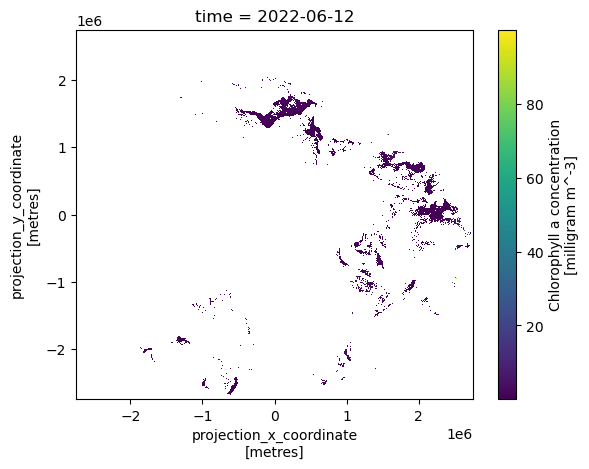

In [4]:
# plot the data
ds.CHL.plot()

interpolo la longitudine

aggrego 5 celle

In [5]:
# Calculate the differences in latitudes and longitudes
delta_latitude = abs(ds.lat.values[1] - ds.lat.values[0])
delta_longitude = abs(ds.lon.values[1] - ds.lon.values[0])

print(f"Spatial resolution (latitude): {delta_latitude} degrees")
print(f"Spatial resolution (longitude): {delta_longitude} degrees")



Spatial resolution (latitude): [0.00195312 0.00195312 0.00195312 ... 0.00195312 0.00195312 0.00195312] degrees
Spatial resolution (longitude): [0.00292969 0.00292969 0.00292969 ... 0.00292969 0.00292969 0.00292969] degrees


In [6]:
delta_latitude = abs(ds.y.values[1] - ds.y.values[0])
delta_longitude = abs(ds.x.values[1] - ds.x.values[0])

print(f"Spatial resolution (latitude): {delta_latitude} m")
print(f"Spatial resolution (longitude): {delta_longitude} m")



Spatial resolution (latitude): 300.0 m
Spatial resolution (longitude): 300.0 m


In [6]:
# carico una già coarsened
ds_co = xr.open_dataset(pathOLD + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month))
# seleziono il 12 giugno
ds_co = ds_co.sel(time='{}-{:02d}-{:02d}'.format(year, month, day))
ds_co

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056)
Coordinates:
    time       datetime64[ns] 2022-07-18
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    CHL        (latitude, longitude) float32 ...

In [7]:
loy  = ds_co.latitude.values[-1]
print(ds)
# trova il ds.x più vicino a loy

# Calculate the absolute differences for lat and lon
lat_diff = abs(ds.lat - loy)

# Combine the differences to a single difference measure
combined_diff = lat_diff 

# Find the location of the minimum combined difference
min_loc = np.unravel_index(combined_diff.argmin(), combined_diff.shape)

# Extract the corresponding x and y values
nearest_x = ds.x[min_loc[1]].values
nearest_y = ds.y[min_loc[0]].values

print(nearest_x, nearest_y)


<xarray.Dataset>
Dimensions:        (time: 1, y: 18345, x: 18345)
Coordinates:
  * time           (time) datetime64[ns] 2022-07-18
  * y              (y) float32 -2.752e+06 -2.751e+06 ... 2.751e+06 2.752e+06
  * x              (x) float32 -2.752e+06 -2.751e+06 ... 2.751e+06 2.752e+06
    lat            (y, x) float32 55.15 55.15 55.15 55.16 ... 55.15 55.15 55.15
    lon            (y, x) float32 -90.0 -90.0 -89.99 -89.99 ... 90.01 90.0 90.0
Data variables:
    stereographic  int32 ...
    SENSORMASK     (time, y, x) float32 ...
    CHL            (time, y, x) float32 ...
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_ar

(array([4984719., 4456104., 4042485., 3709970., 3443829., 3230767.,
        3058658., 2923194., 2818995., 2740052., 2686733., 2654224.,
        2643764., 2654928., 2685995., 2740040., 2818981., 2923151.,
        3059467., 3229856., 3443754., 3710954., 4041347., 4455986.,
        4976803., 4983432., 4456233., 4042607., 3710054., 3444785.,
        3229905., 3058703., 2924001., 2818244., 2740083., 2686727.,
        2654231., 2644485., 2654218., 2685977., 2740775., 2818222.,
        2923075., 3059452., 3229802., 3444659., 3709892., 4041253.,
        4457133., 4976809., 4982162., 4457504., 4041555., 3710132.,
        3444853., 3229962., 3059552., 2923218., 2818271., 2740837.,
        2686007., 2654237., 2644478., 2654214., 2686702., 2740024.,
        2818174., 2923872., 3058603., 3229748., 3444603., 3709809.,
        4042294., 4455853., 4978092., 4982166., 4456357., 4041654.,
        3711176., 3443945., 3230016., 3059602., 2923248., 2819044.,
        2740098., 2686017., 2654972., 2643759., 

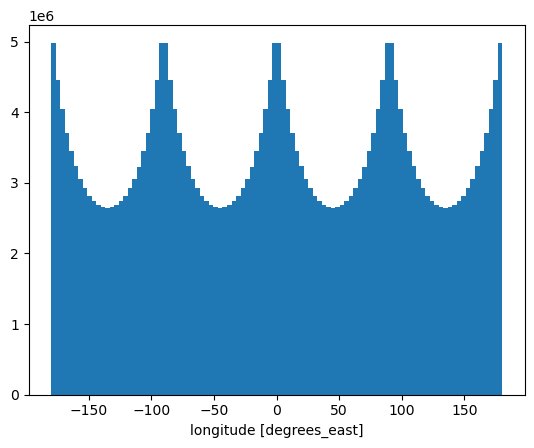

In [9]:
# istogramma di ds lat
ds.lon.plot.hist(bins=100)

In [8]:
# Extract min and max latitude and longitude from ds_co
min_lat = 65
max_lat = 88
min_lon = -15
max_lon = 70

# Find the indices where lat and lon from ds fall within the bounds of ds_co
lat_mask = (ds.lat >= min_lat) & (ds.lat <= max_lat)
lon_mask = (ds.lon >= min_lon) & (ds.lon <= max_lon)
combined_mask = lat_mask & lon_mask

# Get the min and max x, y indices
y_indices, x_indices = np.where(combined_mask)
min_x, max_x = x_indices.min(), x_indices.max()
min_y, max_y = y_indices.min(), y_indices.max()

# Use these indices to select the portion from ds
ds_cropped = ds.isel(y=slice(min_y, max_y), x=slice(min_x, max_x))

print(ds_cropped)

<xarray.Dataset>
Dimensions:        (time: 1, y: 11813, x: 8805)
Coordinates:
  * time           (time) datetime64[ns] 2022-07-18
  * y              (y) float32 -2.382e+06 -2.382e+06 ... 1.162e+06 1.162e+06
  * x              (x) float32 1.086e+05 1.089e+05 ... 2.75e+06 2.75e+06
    lat            (y, x) float32 68.25 68.25 68.25 68.25 ... 62.94 62.94 62.94
    lon            (y, x) float32 -42.39 -42.38 -42.38 ... 67.91 67.91 67.91
Data variables:
    stereographic  int32 ...
    SENSORMASK     (time, y, x) float32 ...
    CHL            (time, y, x) float32 ...
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-pl

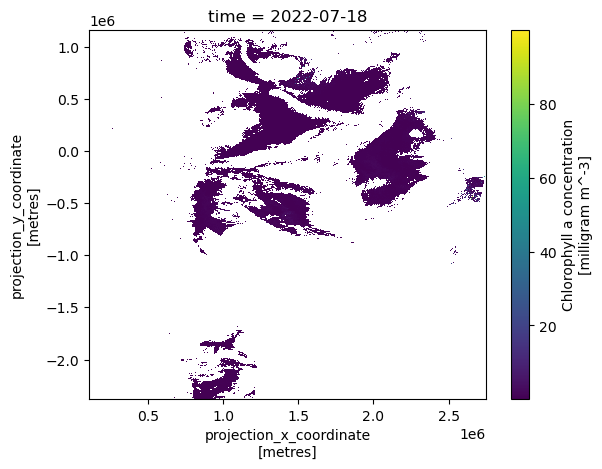

In [9]:
# plot ds_cropped
ds_cropped.CHL.plot()

In [19]:


# Set the original dataset's crs 
ds_cropped2 = ds_cropped[['CHL']]  # Only include the CHL data variable for now
ds_cropped2 = ds_cropped2.drop_vars(["lat", "lon"])

# specifica il sistema di riferimento proj4	+proj=stere +lon_0=-45 +lat_0=90 +k=1 +R=6378273


#ds_cropped2 = ds_cropped2.rio.write_crs("EPSG:32662")  # Replace xxxx with the EPSG code of your source CRS.
ds_cropped2 = ds_cropped2.rio.write_crs("+proj=stere +lon_0=-45 +lat_0=90 +k=1 +R=6378273")

# Reproject the dataset to WGS84 (EPSG:4326)
ds_reprojected = ds_cropped2.rio.reproject("EPSG:4326")

In [15]:
ds_reprojected

<xarray.Dataset>
Dimensions:        (x: 19889, y: 3654, time: 1)
Coordinates:
  * x              (x) float64 2.611 2.62 2.629 2.637 ... 174.6 174.7 174.7
  * y              (y) float64 89.0 88.99 88.98 88.97 ... 57.42 57.41 57.4 57.39
  * time           (time) datetime64[ns] 2022-07-18
    stereographic  int64 0
Data variables:
    CHL            (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D
    cmems_product_id:        OCEANCOLOUR_ARC_BGC_L3_MY_009_123
    stop_date:               2022-07-18
    creation_date:           2023-09-01
    creation_time:           03:47:59 UTC

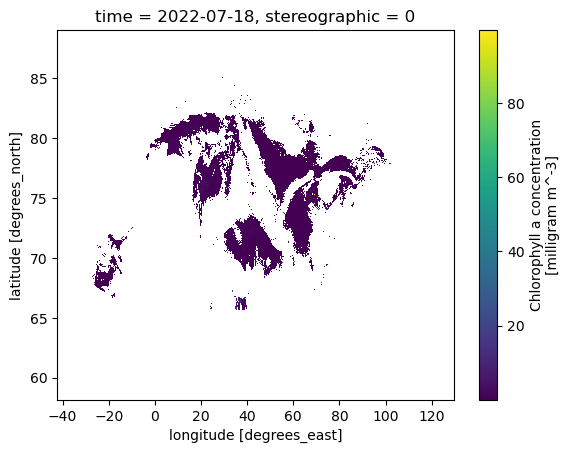

In [20]:
ds_reprojected.CHL.plot()

In [21]:
ds_reprojected

# crop ds reprojected to the same extent of the coarsened one
ds_reprojected = ds_reprojected.sel(y=slice(ds_co.latitude.values[0], ds_co.latitude.values[-1]), x=slice(ds_co.longitude.values[0], ds_co.longitude.values[-1]))

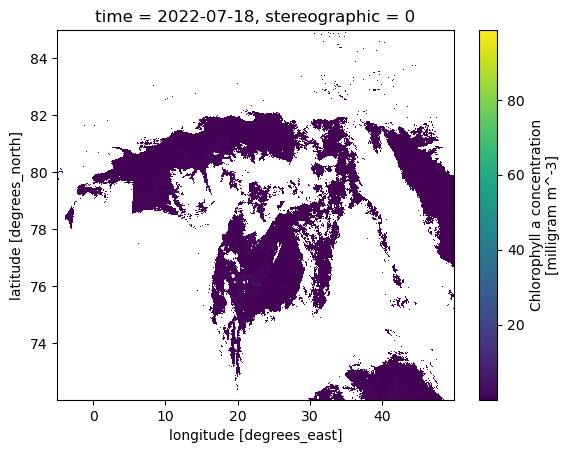

In [22]:
ds_reprojected.CHL.plot()

In [27]:
ds_reprojected = ds_reprojected.rio.write_crs("EPSG:4326")

# riproietta nel sistema "+proj=stere +lon_0=-45 +lat_0=90 +k=1 +R=6378273"
ds_reprojected2 = ds_cropped2.rio.reproject("+proj=stere +lon_0=-45 +lat_0=90 +k=1 +R=6378273")

In [ ]:
ds_reprojected2

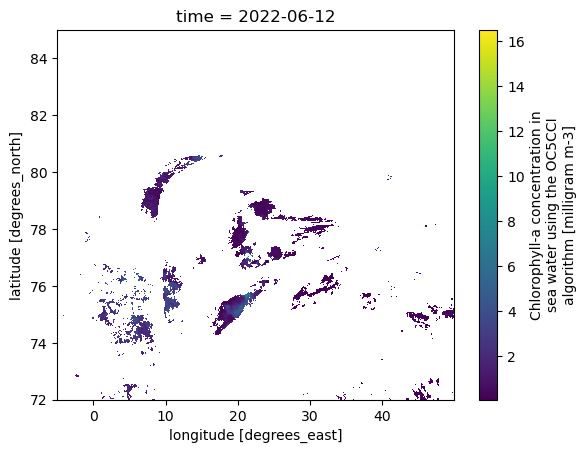

In [16]:
ds_co.CHL.plot()

In [17]:
delta_longitude

300.0

In [18]:
# set consistent _FillValue and missing_value attributes for the 'CHL' variable
encoding = {'CHL': {'_FillValue': -999.0, 'missing_value': -999.0}}



In [19]:
# salvo il dataset
ds_reprojected.to_netcdf('/mnt/d/Dropbox/R_projects/SV_phenology' +  '/esempio_300mreproj_{}_{}.nc'.format(year, month), encoding=encoding)

In [20]:
# interpola ds_reprojected sulla griglia di ds_co
ds_reprojected_interp = ds_reprojected.interp(x=ds_co.longitude.values, y=ds_co.latitude.values, method='nearest')
ds_reprojected_interp.to_netcdf('/mnt/d/Dropbox/R_projects/SV_phenology' +  '/esempio_300m_Coarsened_reproj_{}_{}.nc'.format(year, month), encoding=encoding)

## Processamento immagini

procedo a modificare tutte le immagini riproiettando e ricampionando


In [21]:
pathDEST
pathCOARS

# creo le cartelle, se non esistono
if not os.path.exists(pathDEST):
    os.makedirs(pathDEST)
    
    
if not os.path.exists(pathCOARS):
    os.makedirs(pathCOARS)
    


ricontrollo la risoluzione

le celle sono quasi quadrate!

In [22]:
# creo la cartella path =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/test_coarsened e salvo il file
# creo la cartella se non esiste già
#os.makedirs('/mnt/d/Dropbox/R_projects/SV_phenology/data/test_coarsened', exist_ok=True)

#ds_coarsened.to_netcdf('/mnt/d/Dropbox/R_projects/SV_phenology/data/test_coarsened' + '/CHL_03-10_{}_{}_coarsenedv2.nc'.format(year, month))


In [23]:

os.makedirs(pathDEST + '{}'.format(year), exist_ok=True)

os.makedirs(pathCOARS + '{}'.format(year), exist_ok=True)



In [24]:
pathOR + '{}'.format(year) +  '/' + '{:02d}'.format(month) 

'/mnt/i/plankton/2022/06'

In [25]:
# carica tutti i file .nc in una cartella
#path = '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily300m/2020'
#path = '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily300m/2021'

#dsm = xr.open_mfdataset(pathOR + '{}'.format(year) +  '/' + '{:02d}'.format(month) + '/*.nc', combine='by_coords')

In [26]:
flist = os.listdir(pathOR + '{}'.format(year) +  '/' + '{:02d}'.format(month))


# delete the elements of the list that are not .nc files
flist = [x for x in flist if x.endswith(".nc")]


flist

['20220601_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220602_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220603_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220604_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220605_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220606_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220607_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220608_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220609_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220610_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220611_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220612_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220613_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220614_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220615_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc',
 '20220616

In [27]:
ds.close()

In [29]:
import os
import xarray as xr
from dask.distributed import Client

# Inizializza un cluster Dask
client = Client()

# set consistent _FillValue and missing_value attributes for the 'CHL' variable
encoding = {'CHL': {'_FillValue': -999.0, 'missing_value': -999.0}}

# loop for each year within 1998 and 2022
for year in range(2022, 2023):
    
    # create a folder for each year in path outh, if does not exist already
    os.makedirs(os.path.join(pathDEST, str(year)), exist_ok=True)
    
    for month in range(3, 11):
        
        month_dir = os.path.join(pathOR, str(year), '{:02d}'.format(month))
        dest_dir = os.path.join(pathDEST, str(year), '{:02d}'.format(month))
        os.makedirs(dest_dir, exist_ok=True)
        
        # elenco files in pathOR + '{}'.format(year) +  '/' + '{:02d}'.format(month) 
        flist = os.listdir(month_dir)
        flist = [x for x in flist if x.endswith(".nc")]
        
        # per ogni file in flist
        for file in flist:
            
            # Check if the file already exists in the destination directory
            if os.path.exists(os.path.join(dest_dir, file)):
                print(f"File {file} already exists in destination. Skipping...")
                continue
            
            # leggo il file in modalità lazy con chunks
            ds = xr.open_dataset(os.path.join(month_dir, file), chunks={'time': 1, 'y': 100, 'x': 100})
            
            # croppo
            ds_cropped = ds.isel(y=slice(min_y, max_y), x=slice(min_x, max_x))
            ds_cropped = ds_cropped[['CHL']]  # Only include the CHL data variable for now
            ds_cropped = ds_cropped.drop_vars(["lat", "lon"])

            # reproject
            ds_cropped = ds_cropped.rio.write_crs("+proj=stere +lon_0=-45 +lat_0=90 +k=1 +R=6378273")  # Replace xxxx with the EPSG code of your source CRS.
            ds_reprojected = ds_cropped.rio.reproject("EPSG:4326")
            
            # crop ds reprojected to the same extent of the coarsened one
            ds_reprojected = ds_reprojected.sel(y=slice(ds_co.latitude.values[0], ds_co.latitude.values[-1]), x=slice(ds_co.longitude.values[0], ds_co.longitude.values[-1]))
            
            # save the subset to a NetCDF file with the updated encoding
            ds_reprojected.to_netcdf(os.path.join(dest_dir, file), encoding=encoding)
            
            print(year, month, file)

            # close the datasets
            ds.close()
            ds_cropped.close()
            ds_reprojected.close()

# Chiudi il client Dask alla fine delle operazioni
client.close()



File 20220301_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc already exists in destination. Skipping...
File 20220302_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc already exists in destination. Skipping...
File 20220303_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc already exists in destination. Skipping...
File 20220304_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc already exists in destination. Skipping...
File 20220305_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc already exists in destination. Skipping...
File 20220306_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc already exists in destination. Skipping...
File 20220307_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc already exists in destination. Skipping...
File 20220308_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc already exists in destination. Skipping...
File 20220309_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc already exists in destination. Skipping...
File 20220

KeyboardInterrupt: 

In [31]:
client.close()

In [34]:
print(flist)

['20220601_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220602_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220603_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220604_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220605_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220606_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220607_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220608_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220609_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220610_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220611_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220612_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220613_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220614_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220615_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc', '20220616_cmems_obs-oc_a

In [28]:
path =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily/'

pathout = '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/'


# set consistent _FillValue and missing_value attributes for the 'CHL' variable
encoding = {'CHL': {'_FillValue': -999.0, 'missing_value': -999.0}}


# loop for each year within 1998 and 2022
for year in range(2022,2023):
    # loop for each month within march and october

    # create a folder for each year in path outh, if does not exist already
    os.makedirs(pathDEST + '{}'.format(year) , exist_ok=True)
    
    for month in range(4, 11):
        
        os.makedirs(pathDEST + '{}'.format(year) +  '/' + '{:}'.format(month), exist_ok=True)
        
        # elenco files in pathOR + '{}'.format(year) +  '/' + '{:02d}'.format(month) 
        flist = os.listdir(pathOR + '{}'.format(year) +  '/' + '{:02d}'.format(month))
        
        # per ogni file in flist
        for file in flist:
            
            # leggo il file
            ds = xr.open_dataset(pathOR + '{}'.format(year) +  '/' + '{:02d}'.format(month) + '/' + file)
            
            # croppo
            ds_cropped = ds.isel(y=slice(min_y, max_y), x=slice(min_x, max_x))
            ds_cropped = ds_cropped[['CHL']]  # Only include the CHL data variable for now
            ds_cropped = ds_cropped.drop_vars(["lat", "lon"])

            # reproject
            ds_cropped = ds_cropped.rio.write_crs("EPSG:3996")  # Replace xxxx with the EPSG code of your source CRS.
            ds_reprojected = ds_cropped.rio.reproject("EPSG:4326")
            
            # crop ds reprojected to the same extent of the coarsened one
            ds_reprojected = ds_reprojected.sel(y=slice(ds_co.latitude.values[0], ds_co.latitude.values[-1]), x=slice(ds_co.longitude.values[0], ds_co.longitude.values[-1]))
            
            # save the subset to a NetCDF file with the updated encoding (nome file= outp + year + 'CHL_03-10_{}_.nc'.format(year))
            ds_reprojected.to_netcdf(pathDEST + '{}'.format(year) +  '/' + '{:02d}'.format(month) +  '/' + file, encoding=encoding)
            
            print(year, month, file)

        # close the dataset
        ds.close()

        # close the subset
        ds_cropped.close()
        ds_reprojected.close()
        
  
        

2022 3 20220301_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220302_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220303_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220304_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220305_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220306_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220307_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220308_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220309_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220310_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220311_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220312_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc
2022 3 20220313_cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D.nc


: 

# Loop for interpolation

In [28]:
path =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily/'

pathout = '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/'


# set consistent _FillValue and missing_value attributes for the 'CHL' variable
encoding = {'CHL': {'_FillValue': -999.0, 'missing_value': -999.0}}


# loop for each year within 1998 and 2022
for year in range(1998,2023):
    # loop for each month within march and october

    # create a folder for each year in path outh, if does not exist already
    os.makedirs(pathout + '{}'.format(year), exist_ok=True)
    
    for month in range(4, 11):
        # temp path concatenate folder for year and month (e.g. 1998/03), with month in two digits

        ds = xr.open_dataset(path + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month))
        
        # read the size of the cells
        delta_longitude = abs(ds.longitude.values[1] - ds.longitude.values[0])


        # coarsen the dataset
        ds_coarsened = ds.interp(longitude=np.arange(ds.longitude[0], ds.longitude[-1], step = 5 * delta_longitude), method='nearest')


        # save the subset to a NetCDF file with the updated encoding (nome file= outp + year + 'CHL_03-10_{}_.nc'.format(year))
        ds_coarsened.to_netcdf(pathout + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month), encoding=encoding)
               

        # close the dataset
        ds.close()

        # close the subset
        ds_coarsened.close()

        # print the year and month
        print(year, month)
        




 

1998 3
1998 4
1998 5
1998 6
1998 7
1998 8
1998 9
1998 10
1999 3
1999 4
1999 5
1999 6
1999 7
1999 8
1999 9
1999 10
2000 3
2000 4
2000 5
2000 6
2000 7
2000 8
2000 9
2000 10
2001 3
2001 4
2001 5
2001 6
2001 7
2001 8
2001 9
2001 10
2002 3
2002 4
2002 5
2002 6
2002 7
2002 8
2002 9
2002 10
2003 3
2003 4
2003 5
2003 6
2003 7
2003 8
2003 9
2003 10
2004 3
2004 4
2004 5
2004 6
2004 7
2004 8
2004 9
2004 10
2005 3
2005 4
2005 5
2005 6
2005 7
2005 8
2005 9
2005 10
2006 3
2006 4
2006 5
2006 6
2006 7
2006 8
2006 9
2006 10
2007 3
2007 4
2007 5
2007 6
2007 7
2007 8
2007 9
2007 10
2008 3
2008 4
2008 5
2008 6
2008 7
2008 8
2008 9
2008 10
2009 3
2009 4
2009 5
2009 6
2009 7
2009 8
2009 9
2009 10
2010 3
2010 4
2010 5
2010 6
2010 7
2010 8
2010 9
2010 10
2011 3
2011 4
2011 5
2011 6
2011 7
2011 8
2011 9
2011 10
2012 3
2012 4
2012 5
2012 6
2012 7
2012 8
2012 9
2012 10
2013 3
2013 4
2013 5
2013 6
2013 7
2013 8
2013 9
2013 10
2014 3
2014 4
2014 5
2014 6
2014 7
2014 8
2014 9
2014 10
2015 3
2015 4
2015 5
2015 6
201